## SIMULAÇÃO SIRC

In [2]:
def solve_sirc_ivp(model, C0, t, N, beta, gamma, I0):
    # Reorganiza a função para compatibilidade com solve_ivp
    def wrapped_model(t, C):
        return model(C, t, N, beta, gamma, I0)

    # Define intervalo de tempo para o integrador
    t_span = (t[0], t[-1])

    # Chamada robusta com controle de tolerâncias
    sol = solve_ivp(
        fun=wrapped_model,
        t_span=t_span,
        y0=[C0],
        t_eval=t,
        method='RK45',       # ou 'LSODA', 'Radau' se quiser mais robusto
        rtol=1e-3,
        atol=1e-6,
        max_step=0.5         # equivalente ao hmax
    )

    if not sol.success:
        raise RuntimeError(f"Falha na integração: {sol.message}")

    return sol.y[0]  # Retorna apenas o vetor C(t)

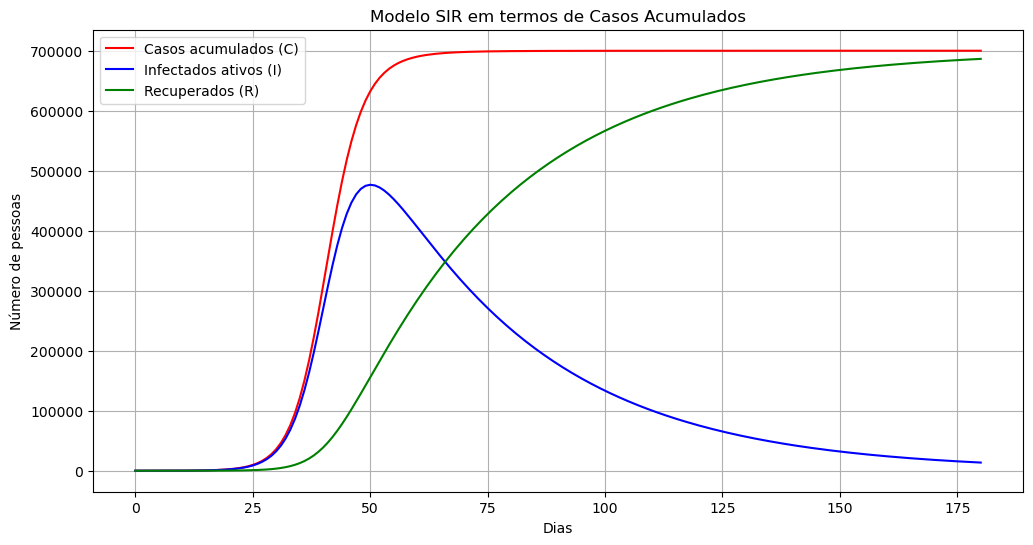

- Infectados INICIAIS: 1.4285714285714285e-05
- Casos acumulados: 699976 (100.0% da população)
- Infectados ativos: 13586
- Recuperados: 686390


In [3]:
import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
import modelos_epidemiologicos as model

# modelo direto. paramentros conhecidos
# Parâmetros do modelo (exemplo numérico)
N =   700000     # População total
beta = 0.3         # Taxa de transmissão
gamma = 1/35       # Taxa de recuperação
Io = 10000         # Infectados inicialmente
C=Io
c0 = Io/N
c0 = 0.01          # Fração inicial de casos (1% da população)

beta = 0.3
gamma = 1/35
N = 700000
I0 = 10
C0 = I0  
t = np.linspace(0, 180, 181)


# Resolvendo a EDO
sol = odeint(model.SIRC,C0,t,args=(N, beta, gamma, I0))
sol2 = solve_sirc_ivp(model.SIRC, C0, t, N, beta, gamma, I0)

C = sol2.flatten()
#C2 = sol.flatten()



# Calculando outras variáveis
c = C / N  # Fração de casos
s = 1 - c  # Suscetíveis
c0=I0/N

r = -(gamma/beta) * np.log((1 - c)/(1 - c0))  # Recuperados (da equação integrada)
i = c - r  # Infectados ativos

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(t, C, 'r-', label='Casos acumulados (C)')
plt.plot(t, i*N, 'b-', label='Infectados ativos (I)')
plt.plot(t, r*N, 'g-', label='Recuperados (R)')
plt.title('Modelo SIR em termos de Casos Acumulados')
plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.legend()
plt.grid(True)
plt.show()

# Mostrando valores no dia 180
print(f"- Infectados INICIAIS: {c0 }")
print(f"- Casos acumulados: {int(C[-1])} ({c[-1]*100:.1f}% da população)")
print(f"- Infectados ativos: {int(i[-1]*N)}")
print(f"- Recuperados: {int(r[-1]*N)}")
